In [41]:
import pandas as pd
import numpy as np

from datetime import datetime




%matplotlib inline


import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go

# Explorative Data Analysis

focus is often a visual representation of the data

In [ ]:
df_plot=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
df_plot.sort_values('date',ascending=False).head()

,date,India,France,US,Germany
886,2022-06-26,43407046,30714200,86967639,27771911
885,2022-06-25,43389973,30714200,86949088,27771112
884,2022-06-24,43378234,30714200,86909716,27771111
883,2022-06-23,43362294,30634890,86757621,27681775
882,2022-06-22,43344958,30555038,86636306,27573585


# Matplotlib Example


<Figure size 432x288 with 0 Axes>

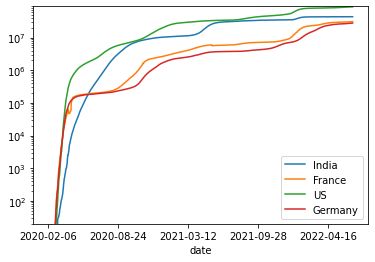

In [ ]:
plt.figure();
ax=df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(20, 90000000)
ax.set_yscale('log')

# Plot.ly

In [ ]:
import plotly.graph_objects as go

In [ ]:
import plotly
plotly.__version__

'5.9.0'

In [ ]:
country_list=['India',
              'France',
              'US',
              'Germany',
             ] 

In [ ]:
fig = go.Figure()
## defines how to plot the individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                                 )
                     )

## defines the overall layout properties
fig.update_layout(
    width=1024,
    height=900,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
)
fig.update_yaxes(type="log",range=[1.1,5.5])


fig.update_layout(xaxis_rangeslider_visible=True)
#fig.show(renderer='chrome')
#fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'width': 2},
              'marker': {'size': 4},
              'mode': 'markers+lines',
              'name': 'India',
              'opacity': 0.9,
              'type': 'scatter',
              'x': array(['2020-01-22', '2020-01-23', '2020-01-24', ..., '2022-06-24',
                          '2022-06-25', '2022-06-26'], dtype=object),
              'y': array([       0,        0,        0, ..., 43378234, 43389973, 43407046],
                         dtype=int64)},
             {'line': {'width': 2},
              'marker': {'size': 4},
              'mode': 'markers+lines',
              'name': 'France',
              'opacity': 0.9,
              'type': 'scatter',
              'x': array(['2020-01-22', '2020-01-23', '2020-01-24', ..., '2022-06-24',
                          '2022-06-25', '2022-06-26'], dtype=object),
              'y': array([       0,        0,        2, ..., 30714200, 30714200, 30714200],
                         dtype=int64)},
             {'line': {'width': 2},
              'marker': {'size': 4},
              'mode': 'markers+lines',
              'name': 'US',
              'opacity': 0.9,
              'type': 'scatter',
              'x': array(['2020-01-22', '2020-01-23', '2020-01-24', ..., '2022-06-24',
                          '2022-06-25', '2022-06-26'], dtype=object),
              'y': array([       1,        1,        2, ..., 86909716, 86949088, 86967639],
                         dtype=int64)},
             {'line': {'width': 2},
              'marker': {'size': 4},
              'mode': 'markers+lines',
              'name': 'Germany',
              'opacity': 0.9,
              'type': 'scatter',
              'x': array(['2020-01-22', '2020-01-23', '2020-01-24', ..., '2022-06-24',
                          '2022-06-25', '2022-06-26'], dtype=object),
              'y': array([       0,        0,        0, ..., 27771111, 27771112, 27771911],
                         dtype=int64)}],
    'layout': {'height': 900,
               'template': '...',
               'width': 1024,
               'xaxis': {'rangeslider': {'visible': True}, 'title': {'text': 'Time'}},
               'yaxis': {'range': [1.1, 5.5],
                         'title': {'text': 'Confirmed infected people (source johns hopkins csse, log-scale)'},
                         'type': 'log'}}
})

In [ ]:
import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'Italy', 'value': 'Italy'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Spain', 'value': 'Spain'},
            {'label': 'Germany', 'value': 'Germany'},
            {'label': 'Korea, South', 'value': 'Korea, South'}
        ],
        value=['US', 'Germany'], # which are pre-selected
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')
])

C:\Users\rohan\AppData\Local\Temp\ipykernel_39056\1380326837.py:3: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

C:\Users\rohan\AppData\Local\Temp\ipykernel_39056\1380326837.py:4: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [ ]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = [] 
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
        )
    }